In [3]:
import numpy as np
import pandas as pd
import sklearn.preprocessing

import seaborn as sns
import matplotlib.pyplot as plt

import wrangle as pp
import model as md

# import splitting
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

import warnings
warnings.filterwarnings("ignore")

# Acquire

In [4]:
prop_df = pd.read_csv('nyc-rolling-sales.csv')
prop_df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [5]:
prop_df.shape

(84548, 22)

In [6]:
# to see all column heads

pd.set_option('display.max_columns', None)
prop_df.head()


,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [7]:
prop_df.NEIGHBORHOOD.unique().shape

(254,)

In [8]:
prop_df.BOROUGH.unique().shape

(5,)

In [9]:
prop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

# Acquire takeaways
- There are unnecessary columns like Unnamed: 0, Block, Lot, Ease-Ment, Address, Apartment, Number which is unnecessary for prediction for the sale price of the homes. They play roles in identification for legal and other purposes.

- Two columns serve the same purpose like Building Class at Present and Building Class at time of Sale, so it is better to get rid of them.

- Sale Price, Land Square Feet, Gross Square Feet are attributes of interest, as they impact the sale price. But they are in data type object. We will take necessary steps in prepare phase to convert it into float.
- Year Built influences the sale price so, we will introduce new attribute age = 2022- built year to analyze, its affect on sale price
- We will keep the sale date in column as the sale price is dependent on sale date.

# Prepare

###### Steps Performed for Cleaning Data
- We will delete these columns from DataFrames as they have low influence in sale price of the property Unnamed: 0, BUILDING CLASS CATEGORY, BLOCK, LOT, EASE-MENT, ADDRESS, APARTMENT NUMBER, BUILDING CLASS AT PRESENT 
- Replacing white space in column head with '_' as it will be easy to deal with column head later on.
- Converting column head to lower string
- getting rid of unneccessary while space in column head
- Replacing '-' value with empty in sale price
- Replacing '-' value with empty in land square feet
- Replacing '-' value with empty in gross square feet
- Replacing one or more space characeters  with Null
- Dropping NAN from DataFrame
- Conveting sale price to float data type
- Conveting land square feet to float data type
- Conveting gross square feet to float data type
- Removing record for which sale price is equal to or less than or equal to 1000
- age column created by subtracting 2022 - year_built
- Dropping year_built
- Removing outliers
- Spliting Data

In [10]:
def remove_outliers(df, k, col_list):
    ''' remove outliers from a list of columns in a dataframe 
        and return that dataframe
    '''
    
    for col in col_list:

        q1, q3 = df[col].quantile([.25, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound

        # return dataframe without outliers
        
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
        
    return df

In [11]:
# We will delete these columns from DataFrames as they have low influence in sale price of the property
# Unnamed: 0, BUILDING CLASS CATEGORY, BLOCK, LOT, EASE-MENT, ADDRESS, APARTMENT NUMBER, BUILDING CLASS AT PRESENT 

prop_df = prop_df.drop(columns = ['Unnamed: 0', 'BUILDING CLASS CATEGORY', 'BLOCK', 'LOT', 'EASE-MENT', 'ADDRESS', 'APARTMENT NUMBER', 'BUILDING CLASS AT PRESENT'])
    

In [12]:
prop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   TAX CLASS AT PRESENT            84548 non-null  object
 3   ZIP CODE                        84548 non-null  int64 
 4   RESIDENTIAL UNITS               84548 non-null  int64 
 5   COMMERCIAL UNITS                84548 non-null  int64 
 6   TOTAL UNITS                     84548 non-null  int64 
 7   LAND SQUARE FEET                84548 non-null  object
 8   GROSS SQUARE FEET               84548 non-null  object
 9   YEAR BUILT                      84548 non-null  int64 
 10  TAX CLASS AT TIME OF SALE       84548 non-null  int64 
 11  BUILDING CLASS AT TIME OF SALE  84548 non-null  object
 12  SALE PRICE                      84548 non-null

In [13]:
# Replacing white space in column head with '_' as it will be easy to deal with column head later on.
prop_df.columns= prop_df.columns.str.replace(' ', '_')

# Converting column head to lower string
prop_df.columns= prop_df.columns.str.lower()

# getting rid of unneccessary while space in column head
prop_df.columns = prop_df.columns.str.strip()

In [14]:
prop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   borough                         84548 non-null  int64 
 1   neighborhood                    84548 non-null  object
 2   tax_class_at_present            84548 non-null  object
 3   zip_code                        84548 non-null  int64 
 4   residential_units               84548 non-null  int64 
 5   commercial_units                84548 non-null  int64 
 6   total_units                     84548 non-null  int64 
 7   land_square_feet                84548 non-null  object
 8   gross_square_feet               84548 non-null  object
 9   year_built                      84548 non-null  int64 
 10  tax_class_at_time_of_sale       84548 non-null  int64 
 11  building_class_at_time_of_sale  84548 non-null  object
 12  sale_price                      84548 non-null

In [15]:
# Replacing '-' value with empty in sale price
prop_df.sale_price = prop_df.sale_price.str.replace("-", "")

# Replacing '-' value with empty in land square feet
prop_df.land_square_feet = prop_df.land_square_feet.str.replace("-", "")

# Replacing '-' value with empty in gross square feet
prop_df.gross_square_feet = prop_df.gross_square_feet.str.replace("-", "")


In [16]:
prop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   borough                         84548 non-null  int64 
 1   neighborhood                    84548 non-null  object
 2   tax_class_at_present            84548 non-null  object
 3   zip_code                        84548 non-null  int64 
 4   residential_units               84548 non-null  int64 
 5   commercial_units                84548 non-null  int64 
 6   total_units                     84548 non-null  int64 
 7   land_square_feet                84548 non-null  object
 8   gross_square_feet               84548 non-null  object
 9   year_built                      84548 non-null  int64 
 10  tax_class_at_time_of_sale       84548 non-null  int64 
 11  building_class_at_time_of_sale  84548 non-null  object
 12  sale_price                      84548 non-null

In [17]:
# Replacing one or more space characeters  with Null
prop_df = prop_df.replace(r'^\s*$', np.nan, regex=True)

In [18]:
# Dropping NAN from DataFrame
prop_df = prop_df.dropna()

In [19]:
prop_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47892 entries, 0 to 84547
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   borough                         47892 non-null  int64 
 1   neighborhood                    47892 non-null  object
 2   tax_class_at_present            47892 non-null  object
 3   zip_code                        47892 non-null  int64 
 4   residential_units               47892 non-null  int64 
 5   commercial_units                47892 non-null  int64 
 6   total_units                     47892 non-null  int64 
 7   land_square_feet                47892 non-null  object
 8   gross_square_feet               47892 non-null  object
 9   year_built                      47892 non-null  int64 
 10  tax_class_at_time_of_sale       47892 non-null  int64 
 11  building_class_at_time_of_sale  47892 non-null  object
 12  sale_price                      47892 non-null

In [20]:
# Conveting sale price to float data type
prop_df.sale_price = prop_df.sale_price.astype(float)

# Conveting land square feet to float data type
prop_df.land_square_feet = prop_df.land_square_feet.astype(float)

# Conveting gross square feet to float data type
prop_df.gross_square_feet = prop_df.gross_square_feet.astype(float)

In [21]:
prop_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47892 entries, 0 to 84547
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   borough                         47892 non-null  int64  
 1   neighborhood                    47892 non-null  object 
 2   tax_class_at_present            47892 non-null  object 
 3   zip_code                        47892 non-null  int64  
 4   residential_units               47892 non-null  int64  
 5   commercial_units                47892 non-null  int64  
 6   total_units                     47892 non-null  int64  
 7   land_square_feet                47892 non-null  float64
 8   gross_square_feet               47892 non-null  float64
 9   year_built                      47892 non-null  int64  
 10  tax_class_at_time_of_sale       47892 non-null  int64  
 11  building_class_at_time_of_sale  47892 non-null  object 
 12  sale_price                      

In [22]:
# Removing record for which sale price is equal to or less than or equal to $1000
prop_df = prop_df[prop_df.sale_price > 1000]

# Removing record for which sale price is equal to or less than or equal to $1000
prop_df = prop_df[prop_df.gross_square_feet > 0]

# Removing record for which sale price is equal to or less than or equal to $1000
prop_df = prop_df[prop_df.land_square_feet > 0]

# age column created by subtracting 2022 - year_built
prop_df['age'] = 2022 - prop_df.year_built

# dropping year_built
prop_df = prop_df.drop(columns = ['year_built'])

col_list = ['total_units', 'land_square_feet', 'gross_square_feet', 'sale_price', 'age']

# Removing outliers
prop_df = remove_outliers(prop_df, 1.5, col_list)

In [23]:
prop_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22582 entries, 4172 to 84545
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   borough                         22582 non-null  int64  
 1   neighborhood                    22582 non-null  object 
 2   tax_class_at_present            22582 non-null  object 
 3   zip_code                        22582 non-null  int64  
 4   residential_units               22582 non-null  int64  
 5   commercial_units                22582 non-null  int64  
 6   total_units                     22582 non-null  int64  
 7   land_square_feet                22582 non-null  float64
 8   gross_square_feet               22582 non-null  float64
 9   tax_class_at_time_of_sale       22582 non-null  int64  
 10  building_class_at_time_of_sale  22582 non-null  object 
 11  sale_price                      22582 non-null  float64
 12  sale_date                    

In [24]:
prop_df.shape

(22582, 14)

- Sale price has non-numerical entries
- Sale price has values of \$ 0 and \$ 10 for sale of properties with in family members for sake of transformation of titles. We will drop them as well, as it will create possible prediction problem.
- Since we are dealing with property of New York, sale of any properties below \$1,000 sounds like it's not real sale between two parties that we are interested in.

In [25]:

train_validate, test = train_test_split(prop_df, test_size=.2, random_state=123)
train, validate = train_test_split(train_validate, test_size=.3, random_state=123)


In [26]:
print(train.shape)
print(validate.shape)
print(test.shape)

(12645, 14)
(5420, 14)
(4517, 14)


In [27]:
prop_df.isnull().sum()

borough                           0
neighborhood                      0
tax_class_at_present              0
zip_code                          0
residential_units                 0
commercial_units                  0
total_units                       0
land_square_feet                  0
gross_square_feet                 0
tax_class_at_time_of_sale         0
building_class_at_time_of_sale    0
sale_price                        0
sale_date                         0
age                               0
dtype: int64

In [28]:
prop_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22582 entries, 4172 to 84545
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   borough                         22582 non-null  int64  
 1   neighborhood                    22582 non-null  object 
 2   tax_class_at_present            22582 non-null  object 
 3   zip_code                        22582 non-null  int64  
 4   residential_units               22582 non-null  int64  
 5   commercial_units                22582 non-null  int64  
 6   total_units                     22582 non-null  int64  
 7   land_square_feet                22582 non-null  float64
 8   gross_square_feet               22582 non-null  float64
 9   tax_class_at_time_of_sale       22582 non-null  int64  
 10  building_class_at_time_of_sale  22582 non-null  object 
 11  sale_price                      22582 non-null  float64
 12  sale_date                    

In [29]:
# Splitting into x / y  and features and target
# Splitting into x / y  and features and target # Needs to be adjusted
X_train = train.drop(columns = ['borough', 'neighborhood', 'tax_class_at_present', 'building_class_at_time_of_sale', 'sale_date', 'sale_price', 'residential_units', 'commercial_units', 'zip_code'])
y_train = train.sale_price

X_validate = validate.drop(columns = ['borough', 'neighborhood', 'tax_class_at_present', 'building_class_at_time_of_sale', 'sale_date', 'sale_price', 'residential_units', 'commercial_units', 'zip_code'])
y_validate = validate.sale_price

X_test = test.drop(columns = ['borough', 'neighborhood', 'tax_class_at_present', 'building_class_at_time_of_sale', 'sale_date', 'sale_price', 'residential_units', 'commercial_units', 'zip_code'])
y_test = test.sale_price

In [30]:
X_train.head()

,total_units,land_square_feet,gross_square_feet,tax_class_at_time_of_sale,age
38029,1,2000.0,1274.0,1,82
43922,2,2100.0,1782.0,1,67
63196,2,4142.0,2296.0,1,67
41776,1,1600.0,1771.0,1,82
25962,3,2020.0,2520.0,1,111


# Scaling:

Text(0.5, 1.0, 'Scaled')

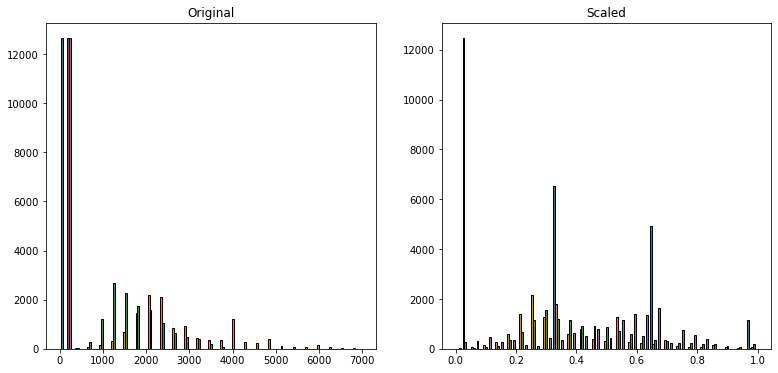

In [32]:


# MinMax Scaling
scaler = sklearn.preprocessing.MinMaxScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_validate_scaled = scaler.transform(X_validate)
X_test_scaled = scaler.transform(X_test)


plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(X_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_scaled, bins=25, ec='black')
plt.title('Scaled')